## Import

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
import isodate

## Channels

In [2]:
br_channels = read_data('Data/BRchannels.jsonl')
us_channels = read_data('Data/USchannels.jsonl')

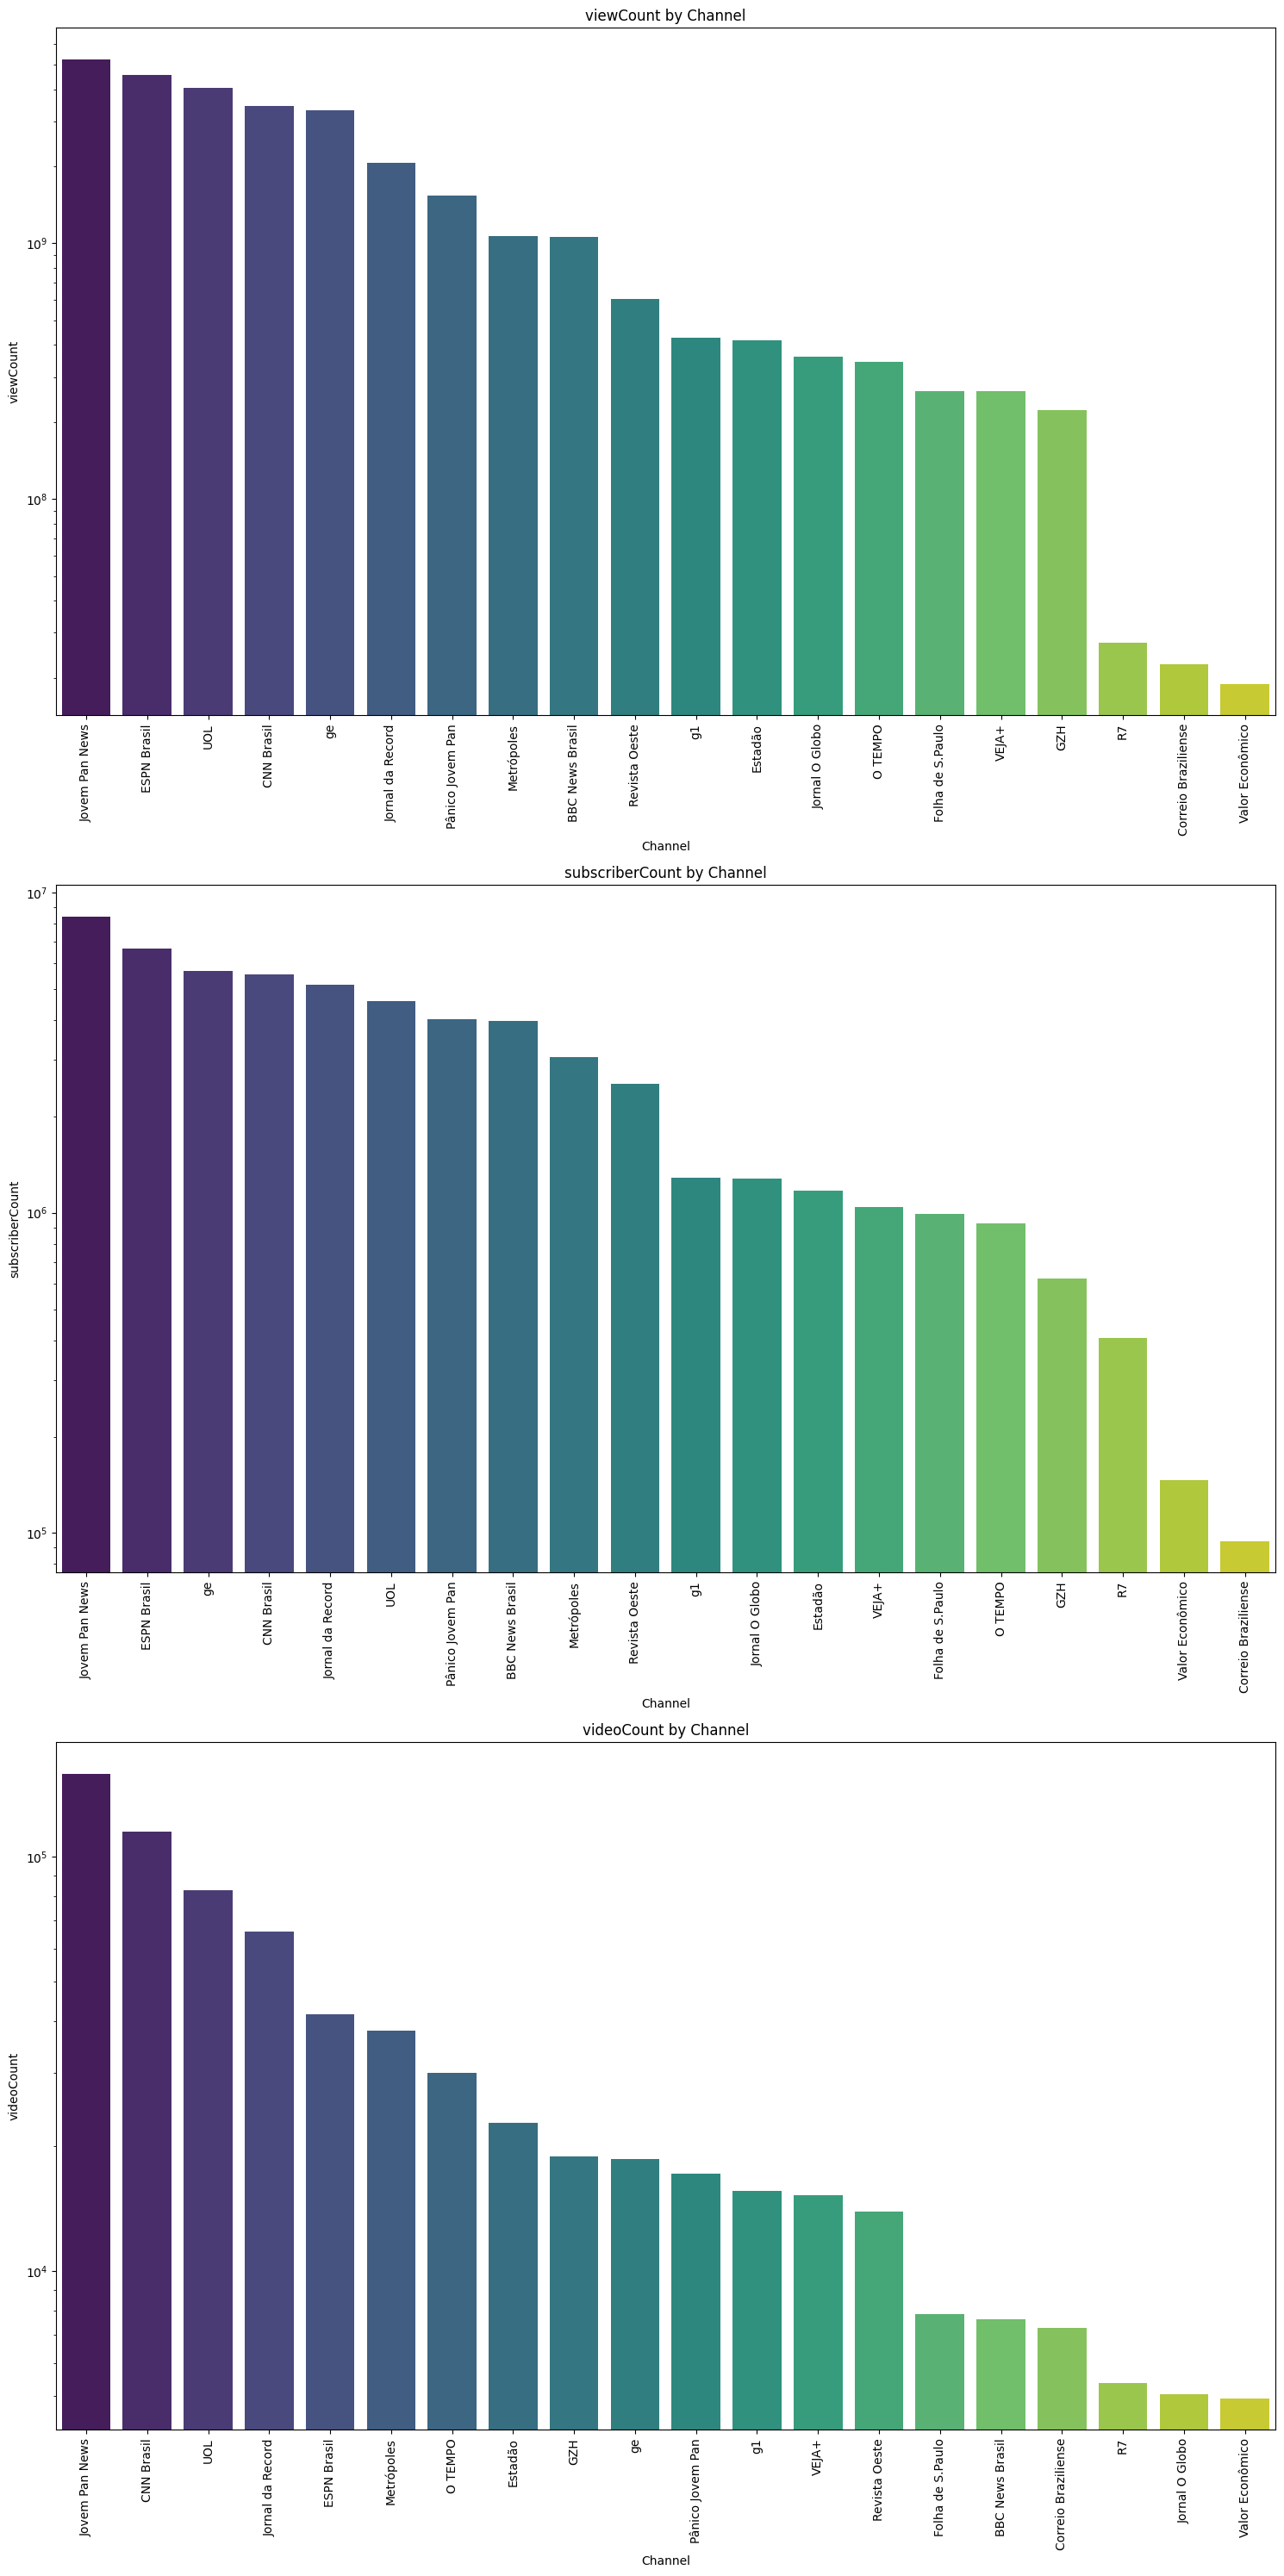

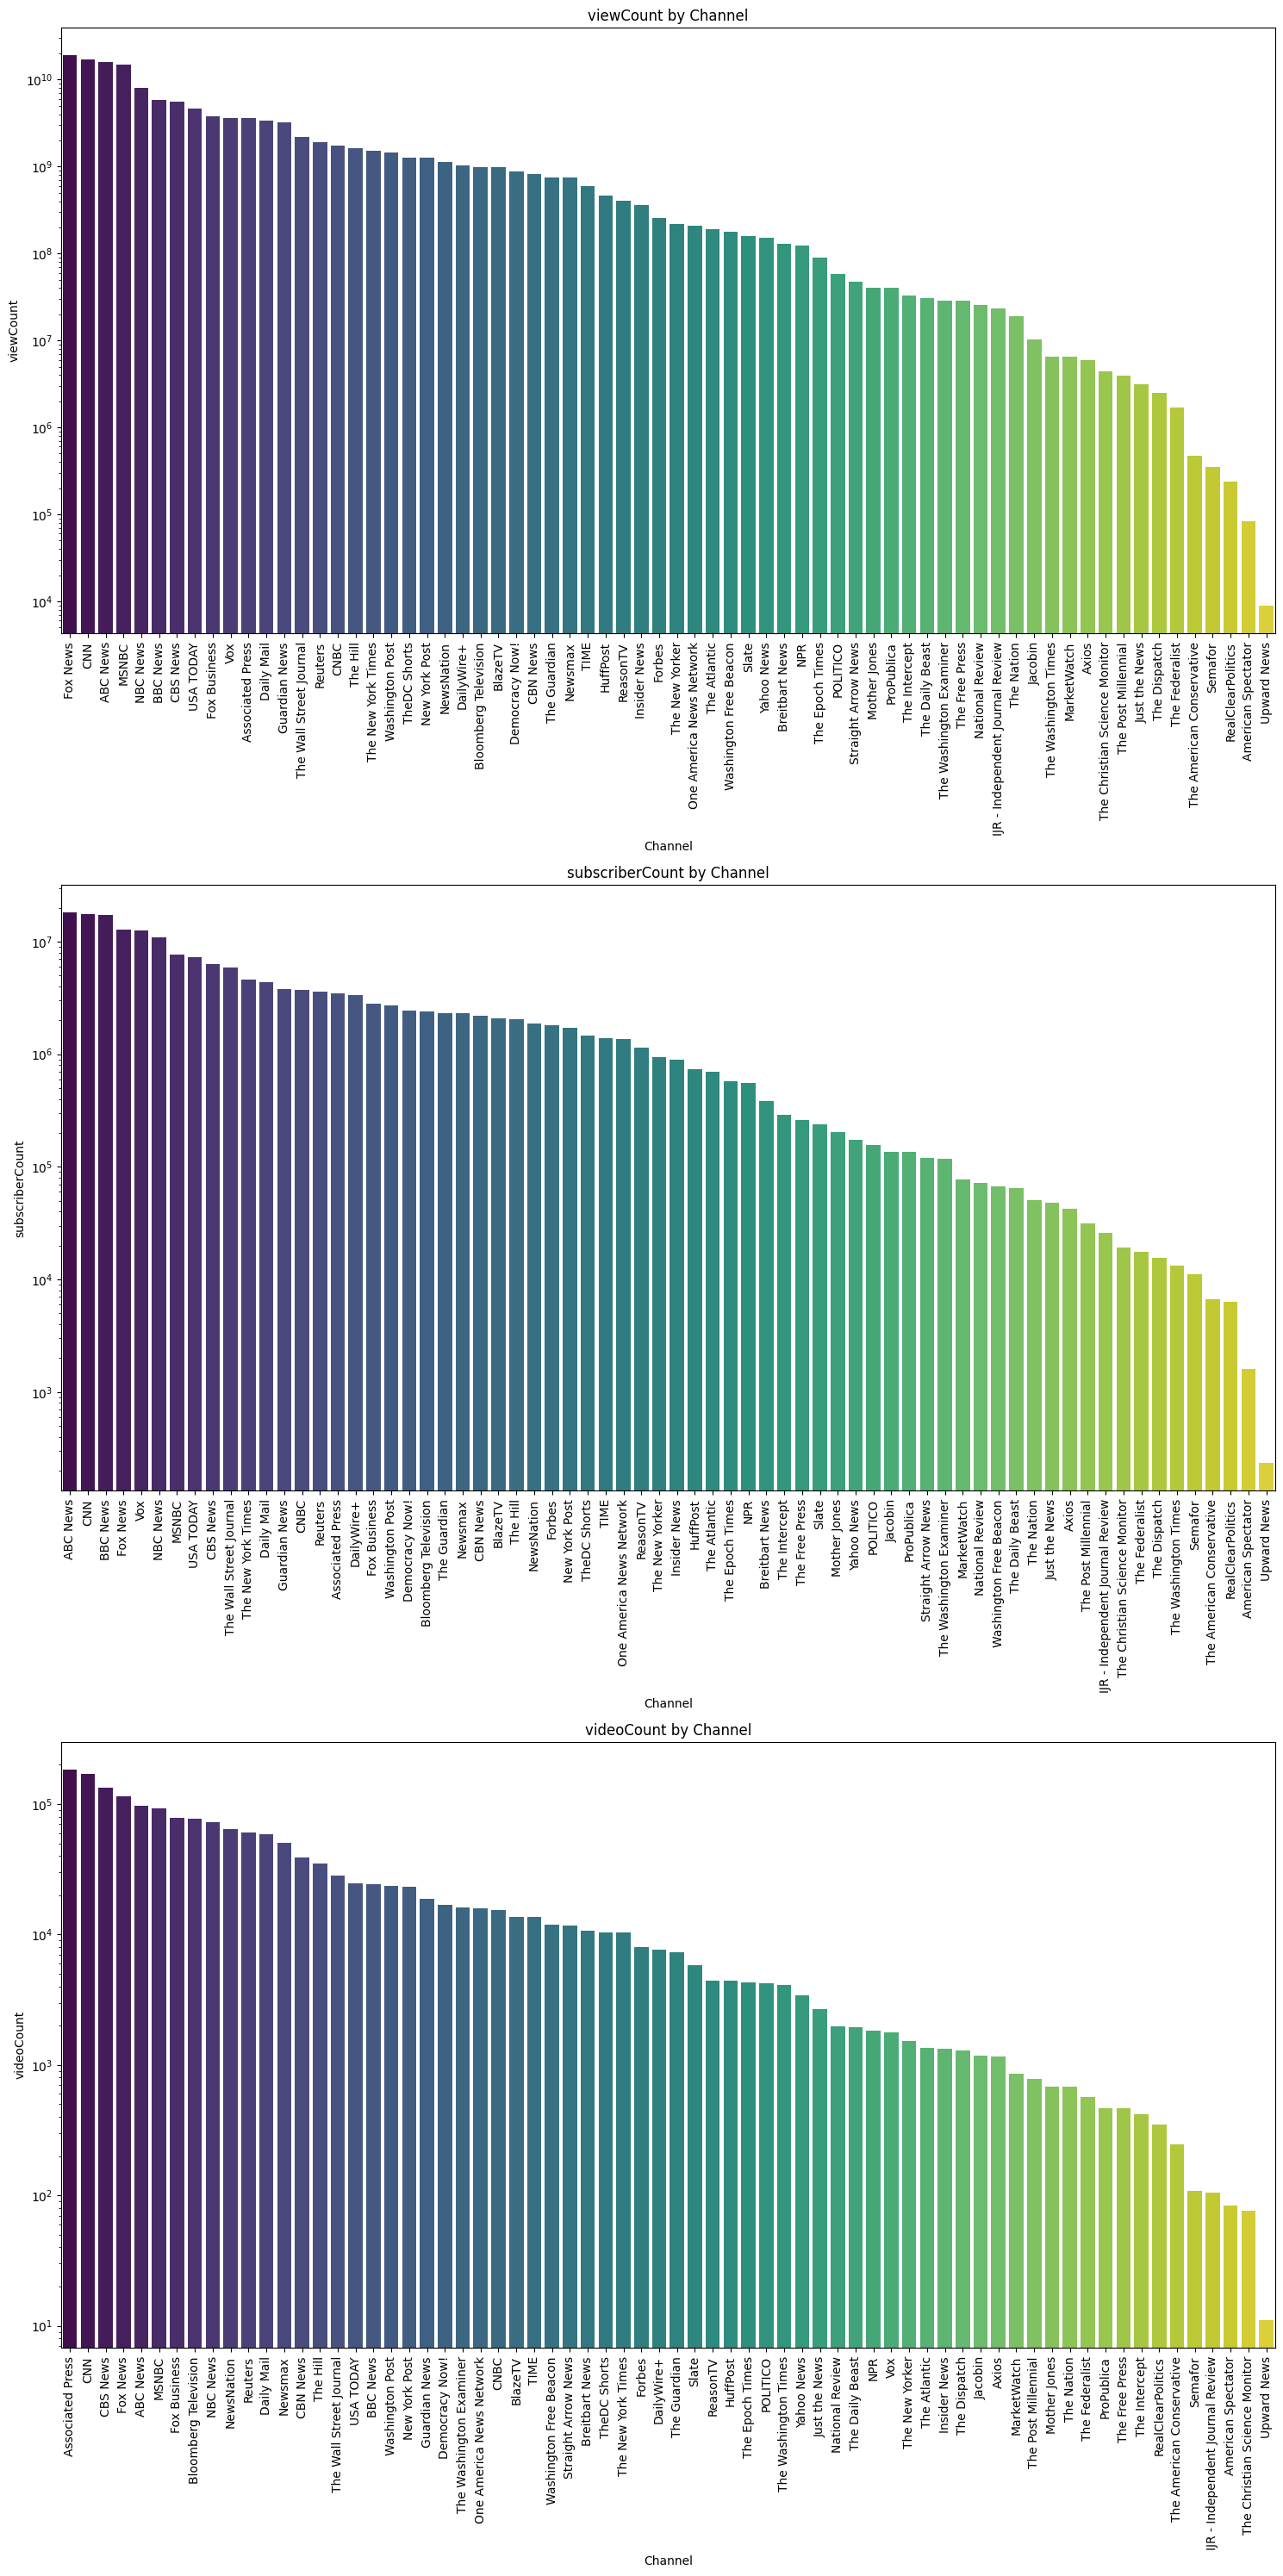

In [3]:
y_cols = ['viewCount','subscriberCount','videoCount']
x_col = 'Title'
barplot(br_channels,y_cols,x_col,'Channel')
barplot(us_channels,y_cols,x_col,'Channel')

## Videos

In [4]:
br_videos = read_data('Data/BRvideos_.jsonl')
us_videos = read_data('Data/USvideos_.jsonl')

In [5]:
terms = ['Generative AI','Bard','OpenAI','Gemini','Aprendizado de Máquina','AI','Deep learning','AI Research','Tendências em IA',
'AI trends','Redes neurais','DALL-E','IA','Copilot','Midjourney','IA Generativa','Stable Diffusion',
'Artificial Intelligence','Anthropic','ChatGPT','LLM','Inteligência Artificial','Sora','GPT','Microsoft',
'Tecnologia de IA','Aprendizado Profundo','Machine Learning','Neural networks','Prompt','Claude','DeepSeek','AI Technology','Pesquisa em IA']


### Filtering

In [6]:
us_filtered = filter_videos(us_videos,terms)
br_filtered = filter_videos(br_videos,terms)

In [7]:
print("Total of videos in Portuguese:" ,len(br_videos))
print("Total of videos in English:",len(us_videos))
print("Total of videos filtered in Portuguese:" ,len(br_filtered))
print("Total of videos filtered in English:",len(us_filtered))

Total of videos in Portuguese: 11009
Total of videos in English: 29480
Total of videos filtered in Portuguese: 561
Total of videos filtered in English: 522


### Wordcloud

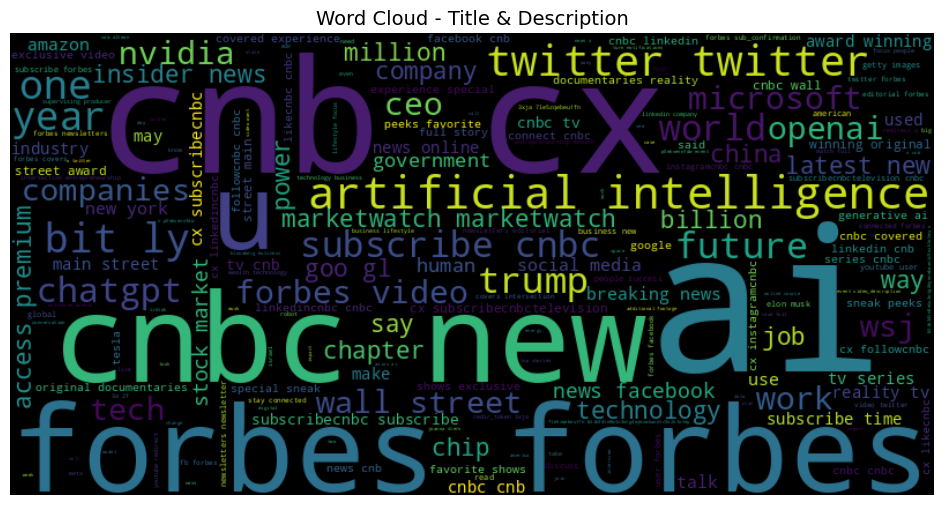

In [8]:
generate_wordcloud(us_filtered)


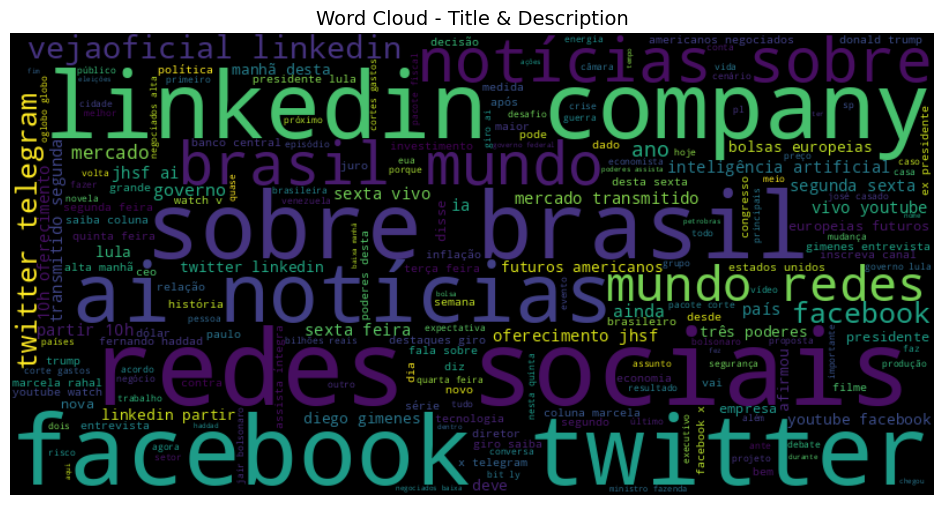

In [9]:
generate_wordcloud(br_filtered) 

### Duration


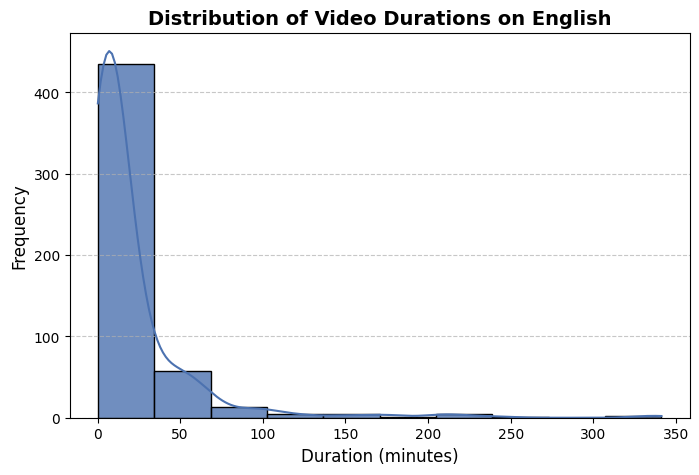

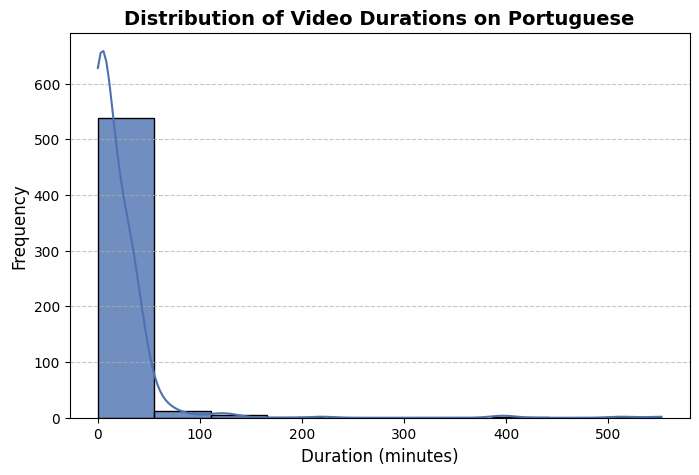

In [ ]:
generate_duration_histogram(us_filtered,'English')
generate_duration_histogram(br_filtered,'Portuguese')

### Year

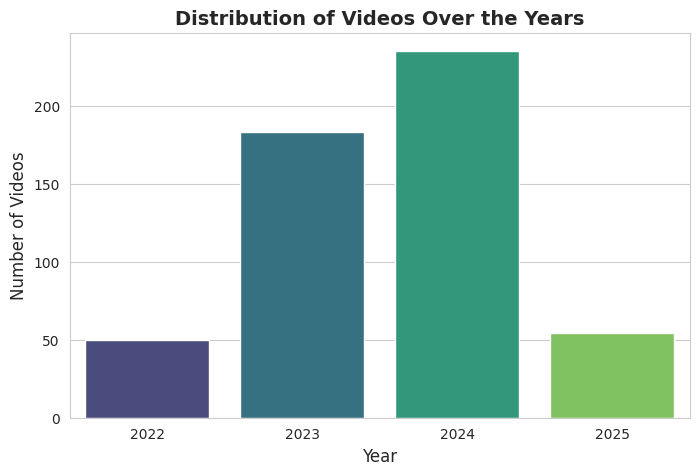

In [ ]:
generate_years_barplot(us_filtered,"English")
generate_years_barplot(br_filtered,"Portuguese")
